In [27]:
import os
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd

# Constants

In [28]:
lead_times = [0, 4, 9]
experiment_name = "SIC_Attention_Res_UNet"
#
date_min = "20210101"
date_max = "20211231"
period = date_min + "_" + date_max
#
path_output = "/lustre/storeB/users/cyrilp/COSI/Figures/Article/" 
#
sizefont = 13
sizefont_legend = 11.5
sizemarker = 5
linewidth = 3
alpha = 1

# Functions

In [29]:
def get_annual_scores(experiment_name, period, lead_times):    
    Annual_scores = {}
    Monthly_scores = {}
    #
    for lt, leadtime in enumerate(lead_times):
        path_exp = "/lustre/storeB/project/copernicus/cosi/WP3/Data/Predictions/" + experiment_name + "/lead_time_" + str(leadtime) + "_days/scores/"
        df = pd.read_csv(path_exp + "Scores_" + period + ".txt", delimiter = "\t")
        df = df.dropna(how = 'all', axis = 1)
        df_date = df["start_date"].astype(str)
        df_month = df_date.str[4:6]
        #
        for var in df:
            var_scores = var + "_lt_" + str(leadtime + 1)
            if "IIEElength" in var:
                Annual_scores[var_scores] = str(np.round(0.001 * np.mean(df[var]), 1))
            else:
                Annual_scores[var_scores] = str(np.round(np.mean(df[var]), 2))
            #
            Monthly_scores[var_scores] = []
            for month in range(1, 13):
                mm = "{:02d}".format(month)
                idx = df_month == mm
                if "IIEElength" in var:
                    var_monthly = 0.001 * np.mean(df[var][idx == True])
                else:
                    var_monthly = np.mean(df[var][idx == True])
                Monthly_scores[var_scores].append(var_monthly) 
    #
    return(Annual_scores, Monthly_scores)

In [30]:
def Monthly_figure(lead_times, Monthly_scores, sizefont, sizefont_legend, sizemarker, path_output, mean_scores = True, save = True):
    #
    nrows = 2
    ncolumns = len(lead_times)
    #
    month_ticks = ["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"]
    caption_ticks = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)", "i)", "j)"]
    #
    plt.figure()
    plt.rc("xtick", labelsize = sizefont)
    plt.rc("ytick", labelsize = sizefont)
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (ncolumns * 5 , nrows * 5), facecolor = "w", edgecolor = "k")
    fig.subplots_adjust(hspace = 0.25, wspace = 0.18)
    ax = ax.ravel()
    #
    for lt, leadtime in enumerate(lead_times):
        lt_str = "_lt_" + str(leadtime + 1)
        l1 = ax[lt].plot(np.arange(12) + 1, Monthly_scores["RMSE_ML" + lt_str], color = "b", label = "Deep learning")
        l2 = ax[lt].plot(np.arange(12) + 1, Monthly_scores["RMSE_TOPAZ" + lt_str], color = "r", label = "TOPAZ4")
        l3 = ax[lt].plot(np.arange(12) + 1, Monthly_scores["RMSE_TOPAZ_bias_corrected" + lt_str], color = "m", label = "TOPAZ4 bias corrected")
        l4 = ax[lt].plot(np.arange(12) + 1, Monthly_scores["RMSE_Persistence" + lt_str], color = "k", label = "Persistence")
        l5 = ax[lt].plot(np.arange(12) + 1, Monthly_scores["RMSE_Anomaly_persistence" + lt_str], color = "darkgrey", label = "Anomaly persistence")
        ax[lt].set_xticks(np.arange(len(month_ticks)) + 1, month_ticks, rotation = 0, ha = 'center', fontsize = sizefont)
        ax[lt].set_xlabel("Forecast start date (month)", fontsize = sizefont)
        ax[lt].grid(alpha = 0.4)
        #
        ax[lt].set_ylabel("RMSE (%)", fontsize = sizefont)
        if leadtime == 0:
            ax[lt].set_title("Lead time: " + str(leadtime + 1) + " day", fontsize = sizefont, fontweight = "bold")
        else:
            ax[lt].set_title("Lead time: " + str(leadtime + 1) + " days", fontsize = sizefont, fontweight = "bold")
        #
        lns = l1 + l2 + l3 + l4 + l5
        labs = [l.get_label() for l in lns]
        #
        ax[lt].text(-0.15,-0.07, caption_ticks[lt], fontsize = sizefont, ha = "left", transform = ax[lt].transAxes) 
        #if lt == 0:
        #    ax[lt].legend(lns, labs, fontsize = sizefont_legend, loc = "best")
    #
    for lt, leadtime in enumerate(lead_times):
        lt_str = "_lt_" + str(leadtime + 1)
        l1 = ax[lt + ncolumns].plot(np.arange(12) + 1, Monthly_scores["IIEElength_15_ML" + lt_str], color = "b", label = "Deep learning")
        l2 = ax[lt + ncolumns].plot(np.arange(12) + 1, Monthly_scores["IIEElength_15_TOPAZ" + lt_str], color = "r", label = "TOPAZ4")
        l3 = ax[lt + ncolumns].plot(np.arange(12) + 1, Monthly_scores["IIEElength_15_TOPAZ_bias_corrected" + lt_str], color = "m", label = "TOPAZ4 bias corrected")
        l4 = ax[lt + ncolumns].plot(np.arange(12) + 1, Monthly_scores["IIEElength_15_Persistence" + lt_str], color = "k", label = "Persistence")
        l5 = ax[lt + ncolumns].plot(np.arange(12) + 1, Monthly_scores["IIEElength_15_Anomaly_persistence" + lt_str], color = "darkgrey", label = "Anomaly persistence")
        ax[lt + ncolumns].set_xticks(np.arange(len(month_ticks)) + 1, month_ticks, rotation = 0, ha = 'center', fontsize = sizefont)
        ax[lt + ncolumns].set_xlabel("Forecast start date (month)", fontsize = sizefont)
        ax[lt + ncolumns].grid(alpha = 0.4)
        #
        ax[lt + ncolumns].set_ylabel("Ice edge distance error (km)", fontsize = sizefont)
        if leadtime == 0:
            ax[lt + ncolumns].set_title("Lead time: " + str(leadtime + 1) + " day", fontsize = sizefont, fontweight = "bold")
        else:
            ax[lt + ncolumns].set_title("Lead time: " + str(leadtime + 1) + " days", fontsize = sizefont, fontweight = "bold")
        #
        lns = l1 + l2 + l3 + l4 + l5
        labs = [l.get_label() for l in lns]
        #
        ax[lt + ncolumns].text(-0.15,-0.07, caption_ticks[lt + ncolumns], fontsize = sizefont, ha = "left", transform = ax[lt + ncolumns].transAxes) 
        if lt == ncolumns - 1:
            ax[lt + ncolumns].legend(lns, labs, fontsize = sizefont_legend, loc = "best")
    #
    if save == True:
        plt.savefig(path_output + "Seasonal_variability_" + date_min + "_" + date_max + ".png", bbox_inches = "tight", dpi = 300)
    else:
        plt.show()

# Data processing 

<Figure size 640x480 with 0 Axes>

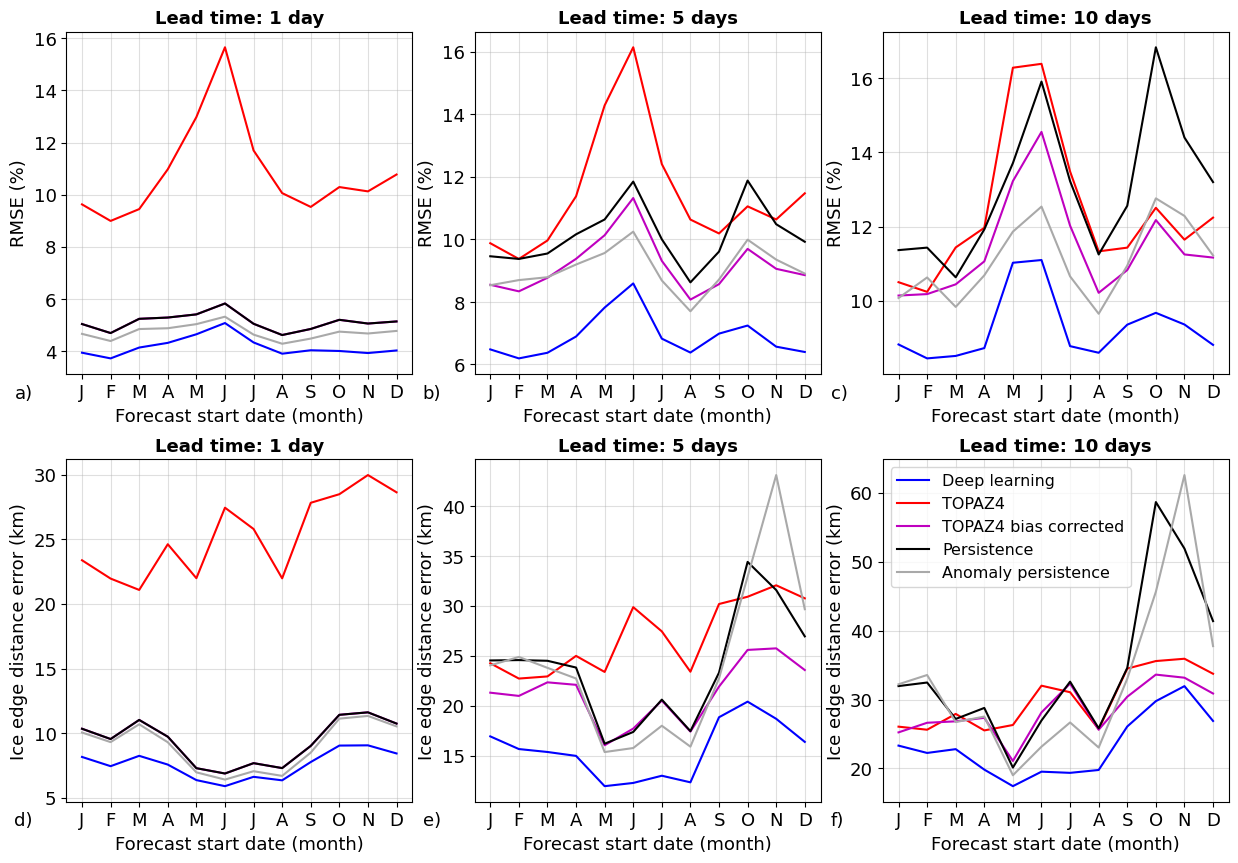

In [31]:
Annual_scores, Monthly_scores = get_annual_scores(experiment_name, period, lead_times)
Monthly_figure(lead_times, Monthly_scores, sizefont, sizefont_legend, sizemarker, path_output, mean_scores = False, save = True)